<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

<img src="daisy2.JPG" />

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it
# .tgz is zip file

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
data_dir.glob('*/*.jpg')

<generator object Path.glob at 0x00000281F3B8CA50>

In [6]:
# this gives all the images with extension .jpg
# this implies this includes all the flowers
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
# the below command iterates into all the images of roses directory 
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

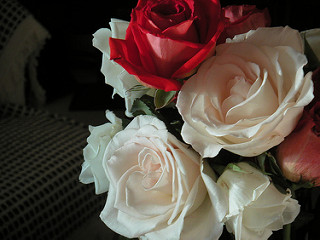

In [9]:
PIL.Image.open(str(roses[1]))

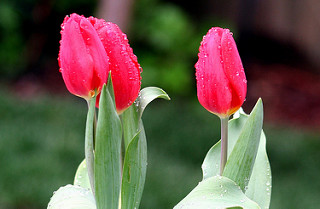

In [10]:
# the below code goes inside the tulips directory and iterates over all the images
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [11]:
flowers_images_dict = {
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'roses': list(data_dir.glob('roses/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [12]:
flowers_labels_dict = {
    'daisy': 0,
    'dandelion': 1,
    'roses': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [13]:
flowers_labels_dict.items()

dict_items([('daisy', 0), ('dandelion', 1), ('roses', 2), ('sunflowers', 3), ('tulips', 4)])

In [14]:
flowers_images_dict['daisy'][:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [15]:
flowers_images_dict['daisy'][0]

WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg')

In [16]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [17]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [18]:
img.shape

(240, 179, 3)

In [19]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [20]:
X, y = [], []

for flower_name, images_loc in flowers_images_dict.items():
    print(flower_name)
    for image in images_loc:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

daisy
dandelion
roses
sunflowers
tulips


In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
X.shape

(3670, 180, 180, 3)

In [23]:
y.shape

(3670,)

In [24]:
y[:5]

array([0, 0, 0, 0, 0])

<h3 style='color:purple'>Train test split</h3>

In [25]:
# if no argument is given for test_size default is 0.25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
# train_test_split method will select the samples randomly
y_train[:50]

array([2, 0, 1, 1, 4, 0, 0, 3, 3, 4, 3, 3, 1, 1, 0, 2, 0, 1, 4, 1, 1, 3,
       2, 3, 4, 3, 3, 1, 0, 3, 4, 4, 0, 0, 0, 4, 1, 2, 1, 1, 1, 2, 4, 0,
       3, 0, 3, 1, 0, 1])

In [27]:
X_train.shape

(2752, 180, 180, 3)

In [28]:
X_test.shape

(918, 180, 180, 3)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [29]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [30]:
num_classes = 5


model = Sequential([
    # 16 is no of filters
    # 3 is filter size (3*3*3)
    # if padding is same then output of convolution is same as input image
    layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # ann
    # from now this is dense network 
    # dense network accepts single dimension array
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              

In [32]:
model.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
86/86 [==============================] - 22s 110ms/step - loss: 1.6131 - accuracy: 0.3031
Epoch 2/30
86/86 [==============================] - 9s 107ms/step - loss: 1.0721 - accuracy: 0.5690
Epoch 3/30
86/86 [==============================] - 9s 108ms/step - loss: 0.8029 - accuracy: 0.6907
Epoch 4/30
86/86 [==============================] - 10s 112ms/step - loss: 0.6538 - accuracy: 0.7714
Epoch 5/30
86/86 [==============================] - 10s 115ms/step - loss: 0.4320 - accuracy: 0.8525
Epoch 6/30
86/86 [==============================] - 9s 105ms/step - loss: 0.2704 - accuracy: 0.9098
Epoch 7/30
86/86 [==============================] - 8s 94ms/step - loss: 0.1301 - accuracy: 0.9641
Epoch 8/30
86/86 [==============================] - 8s 97ms/step - loss: 0.0543 - accuracy: 0.9899
Epoch 9/30
86/86 [==============================] - 8s 96ms/step - loss: 0.0421 - accuracy: 0.9899
Epoch 10/30
86/86 [==============================] - 8s 93ms/step - loss: 0.0154 - accuracy: 0.9990


In [34]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 40ms/step - loss: 2.8328 - accuracy: 0.6558


[2.832777976989746, 0.655773401260376]

In [ ]:
# here training accuracy is above 95% but test accuracy is less than 65% so this is overfitting
# by data agumentation we can reduce the problem of overfitting
# it is not giving good test results because, cnn is trained only perfect orientation of an image
# if the test data orientation is not matched so it gives wrong results, so data agumentation is need

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [35]:
predictions = model.predict(X_test_scaled)
predictions

array([[9.1881003e-07, 9.9999905e-01, 5.5363579e-08, 7.8578160e-12,
        1.4570550e-09],
       [3.8064236e-04, 1.8070480e-01, 8.1766909e-01, 1.2187452e-17,
        1.2454267e-03],
       [4.8986720e-07, 6.2851703e-12, 9.9999940e-01, 8.2642091e-15,
        1.5098610e-07],
       ...,
       [4.8971213e-08, 8.6564002e-14, 9.8875344e-02, 5.5782086e-01,
        3.4330377e-01],
       [1.0000000e+00, 6.0907135e-10, 4.7465430e-12, 3.4473691e-12,
        9.4343588e-11],
       [4.3615757e-11, 2.1944556e-03, 5.6098794e-05, 2.4236278e-01,
        7.5538665e-01]], dtype=float32)

In [366]:
# score = tf.nn.softmax(predictions[0])

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [36]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.5),  
])

In [41]:
data_augmentation(X).shape

TensorShape([3670, 180, 180, 3])

In [54]:
# the array we got is not constant, it will change for each run
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=uint8, numpy=
array([[[159, 154, 155],
        [154, 151, 152],
        [157, 155, 155],
        ...,
        [156, 151, 152],
        [161, 155, 156],
        [161, 156, 157]],

       [[167, 162, 163],
        [159, 156, 156],
        [155, 153, 153],
        ...,
        [160, 155, 156],
        [163, 157, 158],
        [163, 158, 159]],

       [[170, 166, 165],
        [166, 162, 161],
        [159, 155, 154],
        ...,
        [162, 157, 158],
        [162, 157, 158],
        [164, 159, 160]],

       ...,

       [[118, 117, 117],
        [113, 114, 114],
        [104, 105, 105],
        ...,
        [120, 124, 127],
        [122, 125, 129],
        [122, 125, 129]],

       [[122, 120, 120],
        [116, 115, 115],
        [105, 105, 105],
        ...,
        [120, 122, 126],
        [121, 123, 126],
        [120, 125, 128]],

       [[125, 120, 121],
        [119, 117, 117],
        [107, 107, 107],
        ...,
        [124, 123, 12

In [47]:
type(data_augmentation(X)[0].numpy())

numpy.ndarray

In [48]:
type(data_augmentation(X)[0].numpy().astype('uint8'))

numpy.ndarray

**Original Image**

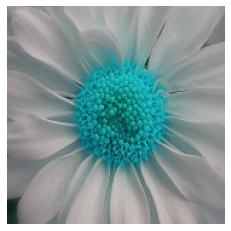

In [49]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

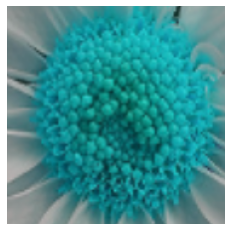

In [51]:
# zoomed out(enalarge) to 50%
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

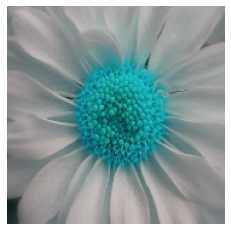

In [55]:
# zoomed in(compressed) to 50%
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
# randomzoom will zoom in or zoom out based on given percentage randomly

In [60]:
img_height = 180 # .shape(1)
img_width = 180 # .shape(0)
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)
data_augmentation.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_1 (RandomFlip)   (None, 180, 180, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 180, 180, 3)       0         
_________________________________________________________________
random_zoom_2 (RandomZoom)   (None, 180, 180, 3)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [61]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.summary()   

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       

In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 12s 105ms/step - loss: 1.8603 - accuracy: 0.2931
Epoch 2/30
86/86 [==============================] - 9s 104ms/step - loss: 1.2029 - accuracy: 0.4721
Epoch 3/30
86/86 [==============================] - 9s 105ms/step - loss: 1.0532 - accuracy: 0.5769
Epoch 4/30
86/86 [==============================] - 9s 104ms/step - loss: 0.9725 - accuracy: 0.6205
Epoch 5/30
86/86 [==============================] - 9s 104ms/step - loss: 0.8828 - accuracy: 0.6689
Epoch 6/30
86/86 [==============================] - 9s 105ms/step - loss: 0.8771 - accuracy: 0.6762
Epoch 7/30
86/86 [==============================] - 9s 105ms/step - loss: 0.7670 - accuracy: 0.7013
Epoch 8/30
86/86 [==============================] - 9s 106ms/step - loss: 0.7569 - accuracy: 0.7022
Epoch 9/30
86/86 [==============================] - 9s 105ms/step - loss: 0.7658 - accuracy: 0.7077
Epoch 10/30
86/86 [==============================] - 9s 105ms/step - loss: 0.7320 - accuracy: 0.727

In [59]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 39ms/step - loss: 0.8895 - accuracy: 0.7386


[0.8894737362861633, 0.7385621070861816]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**